# **IL Baby Birth Analysis: How do different factors affect birth rate?**
JOUR460 Final Project

by Caleb Chow

I have chosen the 2018 birth demographics for Illinois as the dataset for my final project. This dataset categorizes baby births in Illinois by gender, mother’s age, mother’s race, and education. From this dataset, I hope to draw conclusions and correlations between different factors within the demographics of Illinois, and how they affect each other. To incorporate more data into the analysis, I will bring in datasets that show the GDP and population by county in Illinois. By doing this, I will be able to show correlation between geographical location and other factors.

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/calebchow9/JOUR460/master/birth_demographics_2018.csv', index_col=None)
# Get rid of commas from string-numbers
# df = df.replace(',','', regex=True)
# Change the data to integers so we can graph and sum them
# cols = df.columns.drop('Resident County')
# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', downcast = 'float')


# **Is location a dependent factor on what age the mother decides to have a baby?**

For this question, I will use a stacked bar chart visualization, with each bar being a different county. Within each of these bar categories, I will portion the bar into the different age brackets. Because the birth rate per county varies a lot (due to population: some counties only have 30, while others have 60,000+), I will only display counties that had a birth rate of [100-8000].


Text(0, 0.5, 'Births')

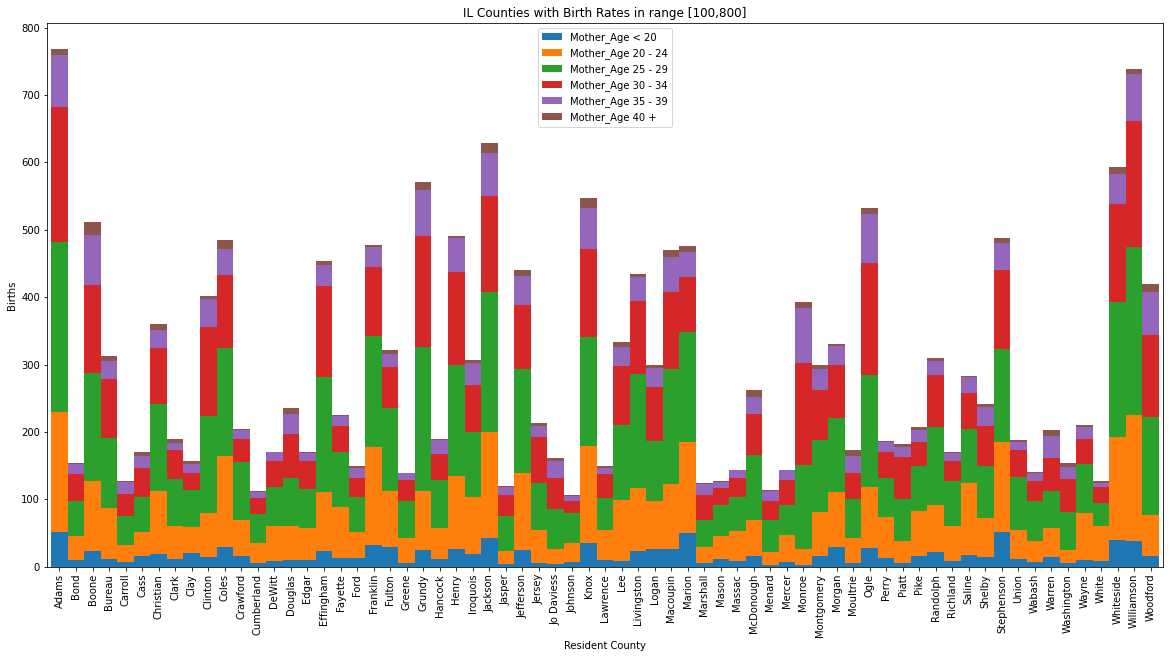

In [0]:
# Relevant columns are 'Mother_Age < 20','Mother_Age 20 - 24', 'Mother_Age 25 - 29', 'Mother_Age 30 - 34', 'Mother_Age 35 - 39', 'Mother_Age 40 +'
# Filter out counties where birth rate was [100,800]
df1 = df[(df.Births >= 100) & (df.Births <= 800)]
# Setup a new dataframe with only the relevant information
df1 = df1[['Resident County', 'Mother_Age < 20', 'Mother_Age 20 - 24', 'Mother_Age 25 - 29', 'Mother_Age 30 - 34','Mother_Age 35 - 39', 'Mother_Age 40 +']].copy()
# Plot the bar chart, categories (x axis) is the counties, y axis is the number of births (in 2018)
barchart = df1.plot.bar(x = 'Resident County', figsize=(20,10), stacked=True, width=1.0, title = 'IL Counties with Birth Rates in range [100,800]')
barchart.set_ylabel('Births')


Glancing at the stacked bar chart, there seems to be nothing out of the ordinary. For each county, there seems to be relatively the same ratio of age brackets. Still, while this chart represents most of the data, it is not representative of the counties with extremely large population, and is therefore only representing a small proportion of the total births in Illinois. As we learned from the modules, it is important to represent **all** data from the dataset rather than cherry picking data to prove a claim.

In order to add in the rest of the counties without making the graph unreadable, if we instead convert the different age brackets to **proportions of total births per county**, then all our bars will be the same size.

Text(0, 0.5, 'Births')

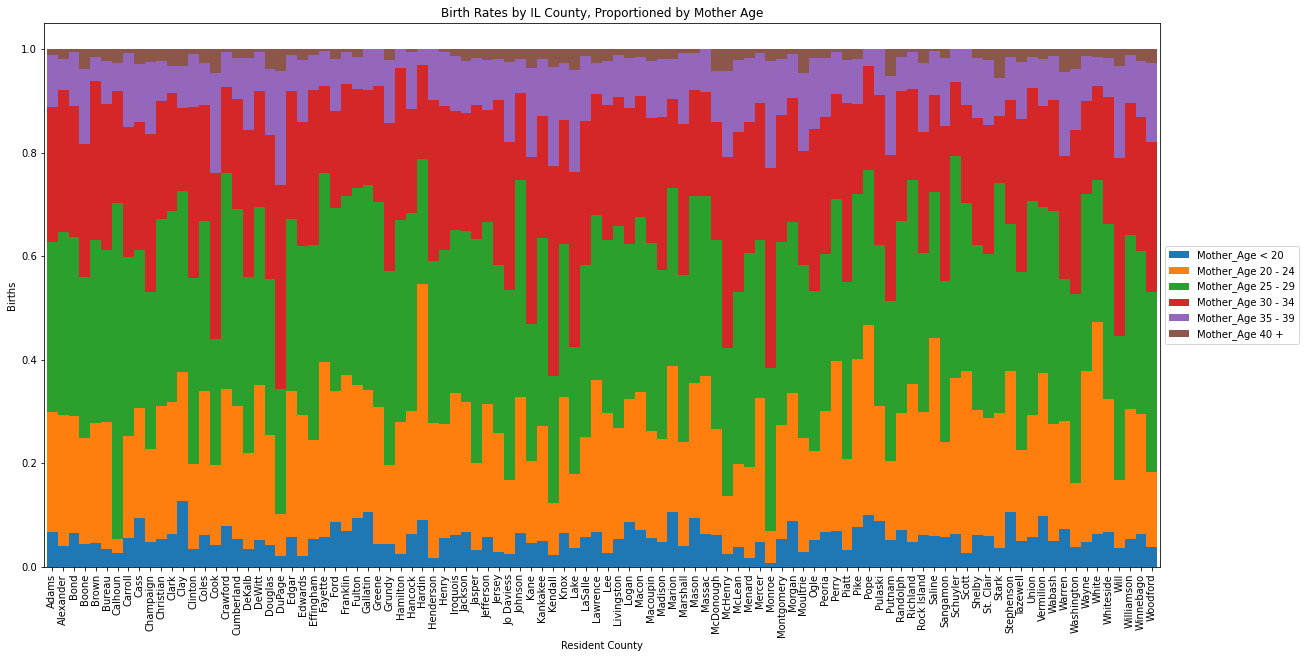

In [0]:
df1prop = df[['Resident County', 'Mother_Age < 20', 'Mother_Age 20 - 24', 'Mother_Age 25 - 29', 'Mother_Age 30 - 34','Mother_Age 35 - 39', 'Mother_Age 40 +']].copy()
columns_to_divide = ['Mother_Age < 20', 'Mother_Age 20 - 24', 'Mother_Age 25 - 29', 'Mother_Age 30 - 34','Mother_Age 35 - 39', 'Mother_Age 40 +']
# Divide all age brackets by the total births in that county
df1prop[columns_to_divide] = df1prop[columns_to_divide].div(df.Births, axis = 0)
# Plot the chart
barchartprop = df1prop.plot.bar(x = 'Resident County', figsize=(20,10), stacked=True, width=1.0, title = 'Birth Rates by IL County, Proportioned by Mother Age')
barchartprop.legend(loc='center left', bbox_to_anchor=(1, 0.5))
barchartprop.set_ylabel('Births')

Note that we are using a bar chart because as we learned in the modules, when it comes to visual perception in humans, we can **most accurately identify differences in bar length**. The most inaccurate form is color hues, so we have only used different colors to differentiate category. An ideal color palette does not have too many colors (~7), which we have here.

When looking at this graph, it is obvious that there are a few outliers in the data (ex. Hardin is an outlier because it has an exteremely large proportion of births with a mother aged 20-24, or Monroe has an extremely small proportion of births with a mother aged 20-24, etc.) However, there does not seem to be a trend by location, as most counties follow the trend of highest proportions in mothers aged 20-35.

**In conclusion, location is not a dependent factor on what age a mother decides to have a baby.**

# **Do counties with a higher average GDP correlate with a lower birth rate?**
For this question, I will use a scatter plot, as it shows correlation between two variables. Each of the counties will be a different point on the scatterplot. To get **birth rate**, which I will put on the **Y-axis**, I will divide the birth rate of the county by population of the county. **X-axis** will be the **GDP per capita of that county**.

I found GDP per county from this government website (https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas). It reports GDP as thousands of chained dollars, so to find GDP per capita, I'll divide this by the population per county, which I found here (https://www.illinois-demographics.com/counties_by_population)

With this question, one can start see if things like a higher income would cause a family to be more career-oriented rather than family oriented, and as a result have less births.

Text(0, 0.5, 'Birth Rate (per population)')

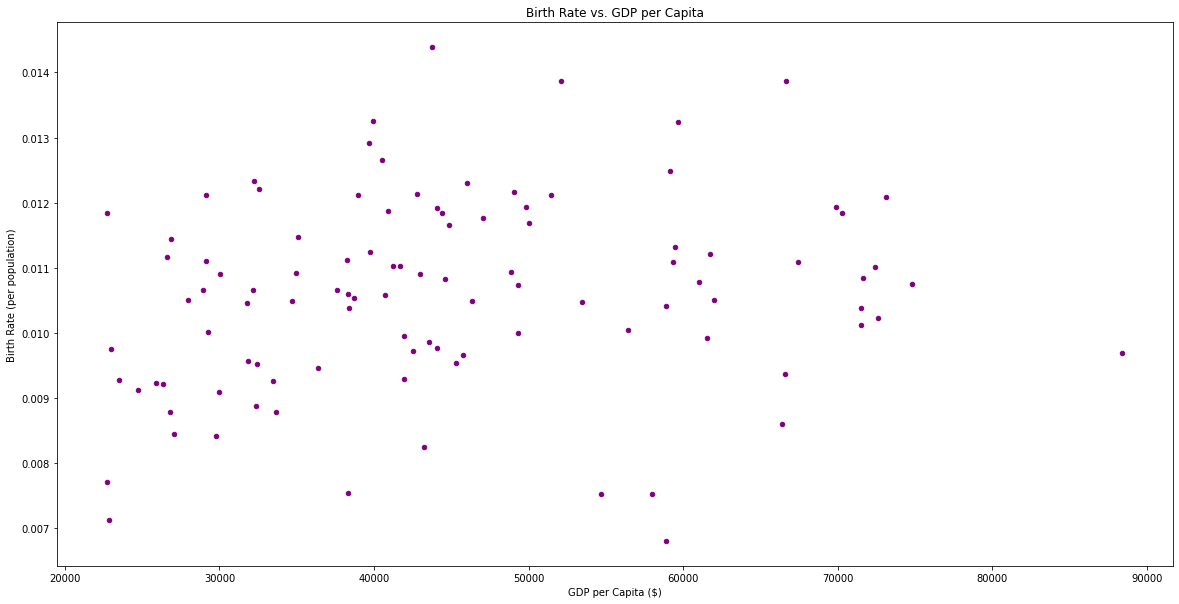

In [0]:
# Relevant columns are 'Births', 'GDP', and 'Population'
df2 = df[['Resident County', 'Births', 'GDP', 'Population']].copy()
# Multiply GDP by 1000 to get GDP in dollars
df2['GDP'] = df2['GDP'] * 1000
# Divide GDP by population to get GDP per capita
df2['GDP_pc'] = df2['GDP'].div(df2.Population, axis = 0)
# Divide births by population to get the birth rate
df2['Birth_Rate'] = df2['Births'].div(df2.Population, axis = 0)
# Plot the bar chart, categories (x axis) is the GDP per capita, y axis is the number of births (in 2018)
splot = df2.plot.scatter(x = 'GDP_pc', y = 'Birth_Rate', title = 'Birth Rate vs. GDP per Capita', figsize=(20,10), c='Purple')
splot.get_xaxis().get_major_formatter().set_scientific(False)
splot.set_xlabel('GDP per Capita ($)')
splot.set_ylabel('Birth Rate (per population)')

As we can see from the chart, a correlation would be indicated by the data following some sort of trend, whether it be linear, exponential, etc. However, when observing this data visualization, it is clear that there is no trend that can be calculated. Therefore, we can say that there is **no correlation between GDP per capita and birth rate.**

# **To what extent is marriage considered important before having a baby?**
In religions like Christianity, there are rules set by the Bible that say that a man and woman should be married before having children. With this dataset, I wanted to find out if this data set would show any resemblance to this.

For this question, I will use a pie chart, as there are only two categories (married before or not married). I want to show how this compares in proportion to the entire amount of baby births in Illinois. 

(https://www.dph.illinois.gov/sites/default/files/Unmarried%20births%201950-2018.pdf) contains data that shows the amount of unmarried mothers compared to the total births since **1950** (1950-2018). Using this, I will draw comparisons from then to now (perhaps this more traditional viewpoint was more prevalent 30 years ago than it is today)


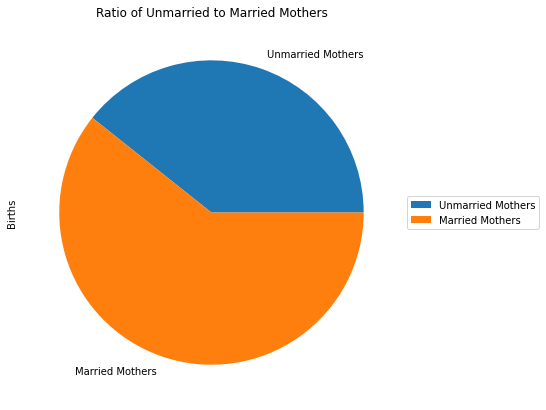

In [0]:
# Relevant columns are 'Births' and 'Mother_Unmarried'
df3 = df[['Births', 'Mother_Unmarried']].copy()
# Make a data frame with married mothers and unmarried mothers data
pie = pd.DataFrame({'Births': [df3['Mother_Unmarried'].sum(), (df3['Births'].sum() - df3['Mother_Unmarried'].sum())]}, index=['Unmarried Mothers', 'Married Mothers'])
pieplot = pie.plot.pie(y = 'Births', figsize=(7,7), title='Ratio of Unmarried to Married Mothers')
pieplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# print(df3['Mother_Unmarried'].sum()/df3['Births'].sum())

A pie chart is good for understanding the ratio at a quick glance, but the downsides, as we learned, are that we **can't quantitatively** take away information from this data visualization. If we used another type of data vis, we could see that **39.3%** of mothers that gave birth in 2018 in IL were **unmarried**, and **60.7%** were **married**.

In this chart, we used the color scheme blue/orange, because as we learned from the module, it is best to choose a color palette that is **color-blind friendly**. This means being careful about choosing colors like red or green.

Using the other dataset, let's create a data visualization that shows data quantitatively to see if we can see a trend between year and percentage of unmarried mothers.

Text(0, 0.5, 'Unmarried Mothers (%)')

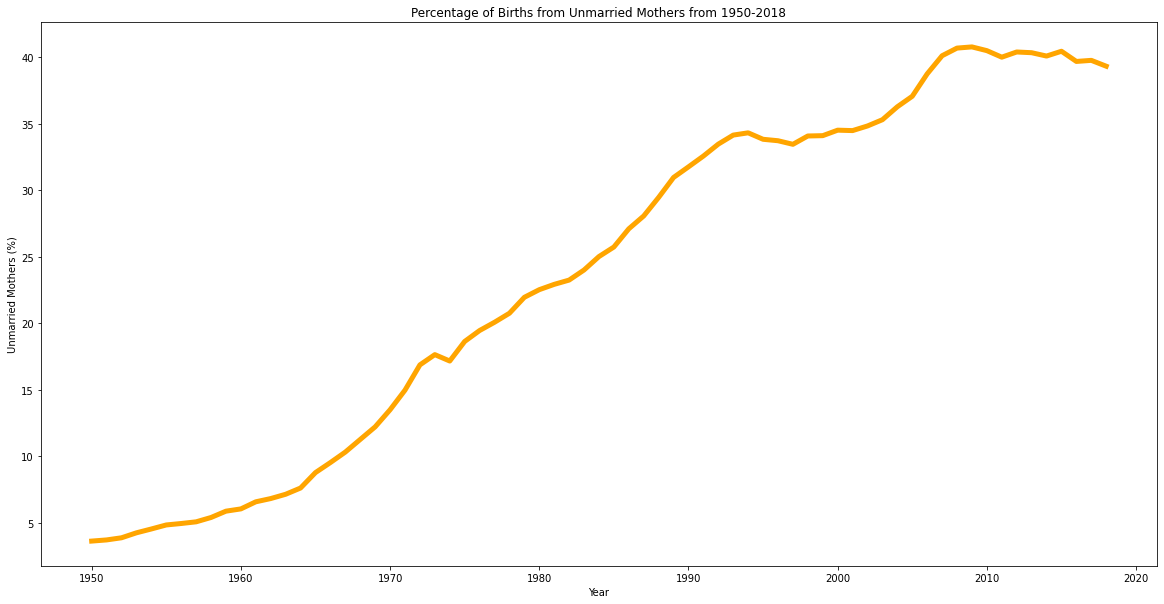

In [0]:
# Import other csv
dfold = pd.read_csv('https://raw.githubusercontent.com/calebchow9/JOUR460/master/unmarried_mothers_1950.csv', index_col=None)
# Divide Unmarried_Mothers by Births to get percentage of unmarried mothers
dfold['p_unmarried'] = dfold['Unmarried_Mothers'].div(dfold.Births, axis = 0)
dfold['p_unmarried'] = dfold['p_unmarried']*100
lineplot = dfold.plot.line(x = 'Year', y = 'p_unmarried', figsize=(20,10), title = 'Percentage of Births from Unmarried Mothers from 1950-2018', legend=False, linewidth=5, c='Orange')
lineplot.set_ylabel('Unmarried Mothers (%)')

Here we can see a **linear**, **increasing** trend between percentage of births from unmarried mothers and the year. Over the past 68 years, there has been a linear increase in the percentage of births from unmarried mothers, although in the last 10 years, there has been a flattening of the curve.

# **Concluding Analysis**
Overall, it was difficult to be able to identify factors based on the data from only one year. However, as I expanded into data sets measured over time, I was able to show relationships between different factors. This project showed the importance of using the correct data visualization to represent data, as each data visualization has its own advantages and disadvantages.